# Inaugural Project: Time Use of Couples

We consider a household with a male and a female member. The jointly maximize utility chooosing their time use:

1. Hourse working in the market, $L_M$ and $L_F$, at wages $w_M$ and $w_F$
2. Hours working at home, $H_M$ and $H_F$

The time choice of time implies: 

1. Consumtion of market goods, $C = w_M L_M + w_F L_F $
2. Consumtion of home production,

$$
H= \begin{cases}\min \left\{H_M, H_F\right\} & \text { if } \sigma=0 \\ H_M^{1-\alpha} H_F^\alpha & \text { if } \sigma=1 \\ \left((1-\alpha) H_M^{\frac{\sigma-1}{\sigma}}+\alpha H_F^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}} & \text { else }\end{cases} 
$$

where $\sigma$ is the elasticity of substitution, and $\frac{\alpha}{1-\alpha}$ is the productivity in home production for females relative to males.

3. Total consumtion, $Q = C^{\omega} H^{1-\omega}, where $\omega$ is the weight on market goods.

The household gets disutility from time spend working. The full maximization problem of
the household is

$$
\begin{aligned}
& \max _{L_M, H_M, L_F, H_F} \frac{Q^{1-\rho}}{1-\rho}-\nu\left(\frac{T_M^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_F^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}\right), \rho>1, \nu>0, \epsilon>0 \\
& \text { s.t. } \\
& C=w_M L_M+w_F L_F \\
& H= \begin{cases}\min \left\{H_M, H_F\right\} & \text { if } \sigma=0 \\
H_M^{1-\alpha} H_F^\alpha & \text { if } \sigma=1 \\
\left((1-\alpha) H_M^{\frac{\sigma-1}{\sigma}}+\alpha H_F^{\frac{\sigma-1}{\sigma}}\right)^{\frac{\sigma}{\sigma-1}} & \text { else }\end{cases} \\
& Q=C^\omega H^{1-\omega} \\
& T_M=L_M+H_M \\
& T_F=L_F+H_F \\
& L_M, H_M, L_F, H_F \geq 0 \\
& T_M, T_F \leq 24 \\
&
\end{aligned}
$$

The baseline parameters are:
1. Preferences: $\rho=2, \nu=0.001, \epsilon=1, \omega=0.5$
2. Household production: $\alpha=0.5, \sigma=1$
3. Wages: $w_M=w_F=1$




# Preamble:

Imports and set magics:

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import HouseholdSpecializationModel as HSM

#from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HSM.HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1:

We first assume that the choice set is discrete in half hours, specifically
$$
L_M, L_F, H_M, H_F \in\left[\frac{0 \cdot 24}{48}, \frac{1 \cdot 24}{48}, \frac{2 \cdot 24}{48}, \ldots, \frac{48 \cdot 24}{48}\right]
$$

We then illustrate how $\frac{H_F}{H_M}$ changes when varying $\alpha \in\{0.25,0.50,0.75\}$ and $\sigma=\{0.5,1.0,1.5\}$

[0.3076923076923077, 1.0, 3.25]
[1.8333333333333333, 3.25, 4.666666666666667]


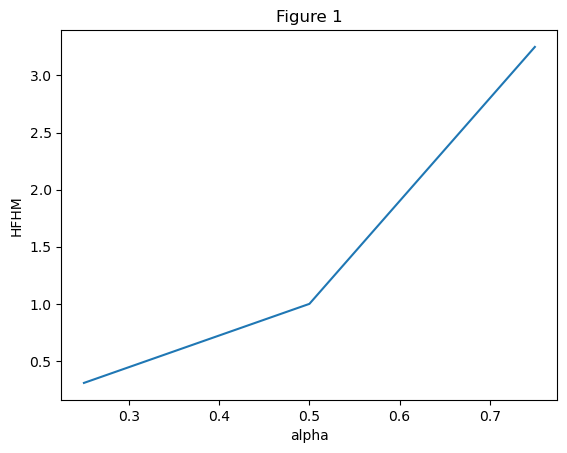

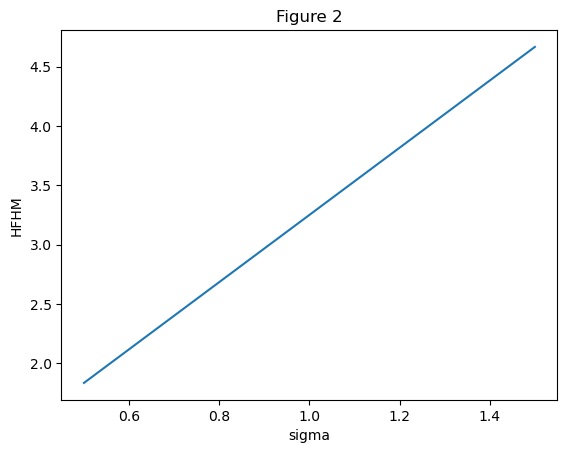

In [45]:
# Parameters 
alphas = np.array([0.25,0.50,0.75])
sigmas = np.array([0.5,1.0,1.5])

# Varying alphas in discrete choice model 
HFHM = [] 

model.solve_discrete() # to reset alpha and sigma 

for alpha in alphas:
    model.par.alpha = alpha
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(HFHM)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(alphas, HFHM)
ax.set_title('Figure 1')
ax.set_xlabel('alpha')
ax.set_ylabel('HFHM');


# Varying sigmas in discret choice model 
HFHM = [] 

model.solve_discrete() # to reset alpha and sigma 

for sigma in sigmas:
    model.par.sigma = sigma
    opt = model.solve_discrete()
    HFHM.append(opt.HF/opt.HM)
print(HFHM)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(sigmas, HFHM)
ax.set_title('Figure 2')
ax.set_xlabel('sigma')
ax.set_ylabel('HFHM');


# Question 2

We solve and plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

[2.0794415416798357, 1.6094379124341003, 1.540445040947149, 1.540445040947149, 1.466337068793427]
[-0.2231435513142097, -0.10536051565782628, 0.0, 0.09531017980432493, 0.1823215567939546]


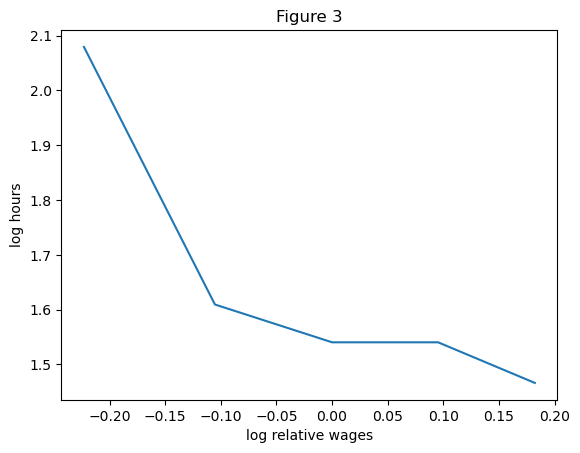

In [46]:
# Logarithmic relative housheold working hours
logHFHM = []
wF_vec = model.par.wF_vec

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logHFHM.append(np.log(opt.HF/opt.HM))
print(logHFHM)

# Logarithmic relative wages 
logWFWM = []            

for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    logWFWM.append(np.log(wF/model.par.wM))
print(logWFWM)

# Plotting relative home working hours against relative wages 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(logWFWM,logHFHM)

ax.set_title('Figure 3')
ax.set_xlabel('log relative wages')
ax.set_ylabel('log hours');


# Question 3

We now assume that the choice set is continuous, i.e.
$$
L_M, L_F, H_M, H_F \in[0,24]
$$

Then we sole and plot $\log \frac{H_F}{H_M}$ against $\log \frac{w_F}{w_M}$ for $w_F \in[0.8,0.9,1.0,1.1,1.2]$

[1.87608367 1.80679521 1.59609072 1.46930747 1.34715415]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


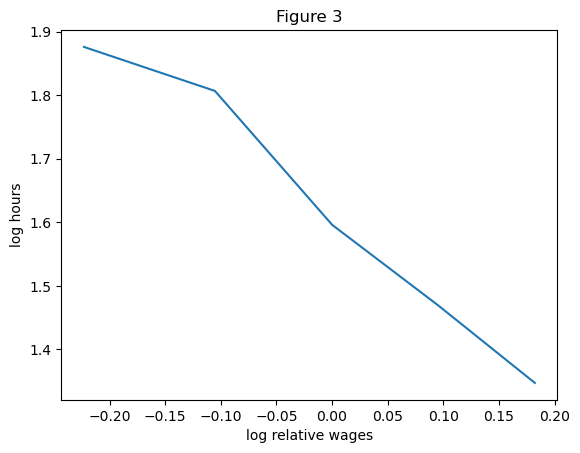

In [47]:
# Solving the continous model 
model.solve_wF_vec()

HFHM = np.log(model.sol.HF_vec/model.sol.HM_vec)
log_wfwm = np.log((wF_vec)/model.par.wM)

print(HFHM)
print(log_wfwm)

# Plotting 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_wfwm,HFHM)

ax.set_title('Figure 3')
ax.set_xlabel('log relative wages')
ax.set_ylabel('log hours');


# Question 4

We know consider the following regression suggested by Siminski and Yetsenga (2022):

$$
\log \frac{H_F}{H_M}=\beta_0+\beta_1 \log \frac{w_F}{w_M}
$$

They find that $\beta_0 \approx 0.4$ and $\beta_1 \approx-0.1$. Wet let $\hat{\beta}_0$ and $\hat{\beta}_1$ denote the same coefficients and run the regression on data from the model for fixed $w_M$ and $w_F \in[0.8,0.9,1.0,1.1,1.2]$.

In [39]:
# Running regression and printing beta0 and beta1 
model.run_regression() 
print(model.sol.beta0)
print(model.sol.beta1)

-5.509669302509188e-06
2.6630822041113308e-05


We know $\alpha$ and $\sigma$ such it minimizes $\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2$. Illustrate how the model fit the data and discuss the economic interpretation of the results...

In [48]:
#Estimate alpha and sigma 
model.estimate()

array([0.19234375, 0.        ])

# Question 5

In [27]:
# Here we make an exentsion of the model 

# Conclusion

ADD CONCISE CONLUSION.